### Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Dataset-20230913T110643Z-001/Dataset/Novel_BinaryML.csv")

In [3]:
df

,PDBid,Sequence,envelope,lumen,plastoglobule,stroma,thylakoid_membrane
0,A1JHN0,MDLCSSTGRGACLSPASTSRPCPAPVHLRGRRLAFSPAQPAGRRHL...,1,0,0,0,0
1,A1L4X0,MDTVLMATTPPIRCLHASIPTVFRSPAIYQVSCRSSQLFSYRSTTM...,1,0,0,0,0
2,A2XLM6,MSSSSLVTSLLFSSSSSSNTATSTSSRRSFSLFSKNQYCKPSPLRR...,1,0,0,0,0
3,A8MPR5,MACRFPLHSSSPSQFLSPENRQRLPRNYPSISCQNNSATNVVHEDG...,1,0,0,0,0
4,A8MS68,MQSAMALSFSQTSFTRPNHVLGSSGSVFSTPRSLRFCGLRREAFGF...,0,0,0,1,0
...,...,...,...,...,...,...,...
116,Q9ZVE7,MAVLSTIYSITRASTPTMASLTNDSPSPLPSSSPSKLPSPTSPSKK...,0,0,0,0,1
117,Q9ZVH7,MMSIPMELMSIRNPNSTLLYRAHSRPPVKLCAPPRSLLPSRRHFSA...,1,0,0,0,0
118,Q9ZVZ9,MGFLVAVMNFSPTLVHHHMKSKPQCQNEKLRQGQTSSLFDRRGFLK...,0,1,0,0,0
119,Q9ZW84,MAYSLPTFPQALPCSSTKTSSSLATFRSPFLRFNGSTSLIPSSISI...,0,0,0,1,0


In [4]:
mul_df=df[df.iloc[:,2:].sum(axis=1)>1]
mul_df

,PDBid,Sequence,envelope,lumen,plastoglobule,stroma,thylakoid_membrane
25,G5DBJ0,MATTLISKLTLSSAFLGQQFSSRGNSMRSAPAGLFLRGPRCAATDT...,1,0,0,0,1
38,Q1KPV0,MRTLISHRQCVTSPFLISAASPPFPGRCFKLSSFTPPRHRRFSSLS...,1,0,0,0,1
55,Q8H0W0,MAMAIAMLPALFSSPSILTSRIRCGATANSGGAISSTSSNSDPRRG...,0,0,0,1,1
61,Q8LPR8,MANEELTESQQQEDPSQQLPNADEEKGSDSDSNSDSDASSQSSGDD...,1,0,0,0,1
62,Q8RWG2,MHFFFVPNSSSSSPSPANTSSFSLSFLTPQIPENLCKSPTKIHIGT...,1,0,0,1,0
68,Q949Q5,MAATFATPSTVIGLGGSSITTKPFSSSFLKPTLSAKNPLRLAGASG...,1,0,0,0,1
74,Q9C9C0,MAKLLLLHAPHVIPRFSSSSSRSLVSAAALYRRPLLVNPQFSHIGP...,0,0,0,1,1
85,Q9FN50,MSSSLLLSGSTVSSSFIAPSKPSLVRNSSKTSLLPFRNVSRSFKTV...,1,0,0,0,1
108,Q9STF2,MASSSTSFPLTTAPPQGVRFNRRKPRLTVWAKQTAFQLGKTKGDDD...,0,0,0,1,1
111,Q9SW18,MPFAPSLLSSSSSVSQFLPRFPNATRFNVTPRSRAATVVAASVTDL...,1,0,0,0,1


In [5]:
mul_df.shape

(10, 7)

In [6]:
df.isnull().sum()

PDBid                 0
Sequence              0
envelope              0
lumen                 0
plastoglobule         0
stroma                0
thylakoid_membrane    0
dtype: int64

In [7]:
df[df['plastoglobule']==0].shape

(121, 7)

In [8]:
data=[]
for i in df['Sequence']:
  data.append(len(i))

In [9]:
data.sort()
data[-1]

1320

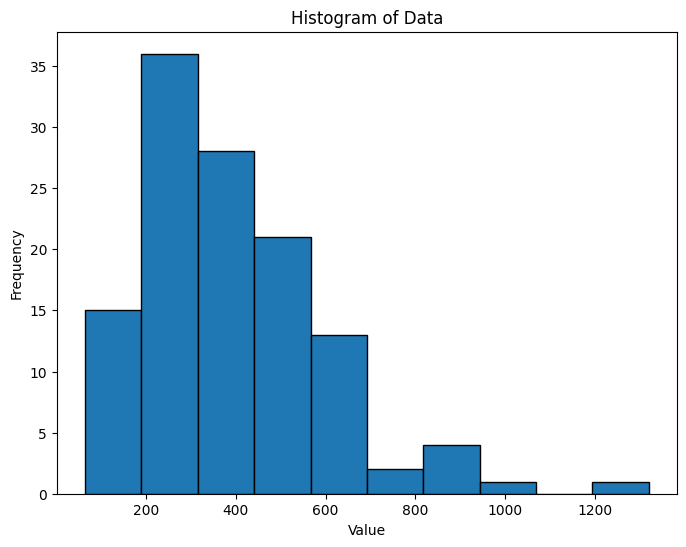

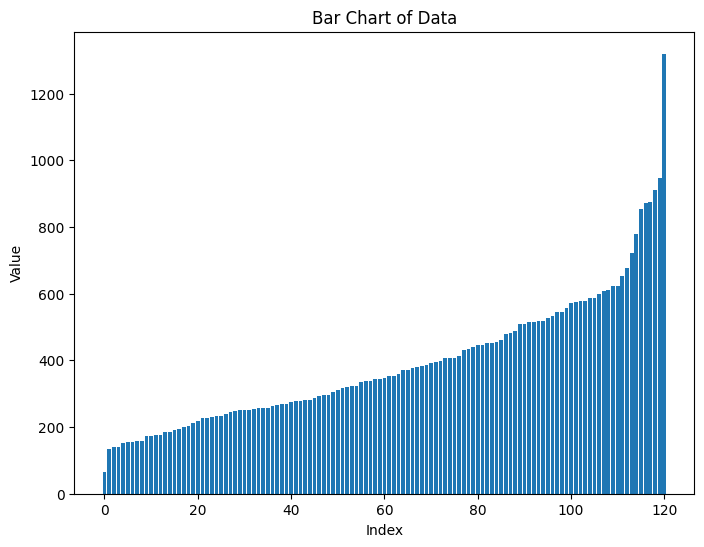

In [10]:
# For histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=10, edgecolor='black')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# For bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(len(data)), data)
plt.title('Bar Chart of Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

## N-grams

In [11]:
import nltk
from nltk.util import ngrams

In [12]:
# Function to generate n-grams for a given sequence
def generate_ngrams(sequence, n):
    tokens = [char for char in sequence]
    n_grams = list(ngrams(tokens, n))
    n_grams = [''.join(gram) for gram in n_grams]
    return n_grams

# Generate bi and trigrams for each input sequence
bi_grams = []
tri_grams = []

for sequence in df['Sequence']:
    bi_grams.append(generate_ngrams(sequence, 2))
    tri_grams.append(generate_ngrams(sequence, 3))


df['Bi-grams'] = bi_grams
df['Tri-grams'] = tri_grams

In [13]:
df

,PDBid,Sequence,envelope,lumen,plastoglobule,stroma,thylakoid_membrane,Bi-grams,Tri-grams
0,A1JHN0,MDLCSSTGRGACLSPASTSRPCPAPVHLRGRRLAFSPAQPAGRRHL...,1,0,0,0,0,"[MD, DL, LC, CS, SS, ST, TG, GR, RG, GA, AC, C...","[MDL, DLC, LCS, CSS, SST, STG, TGR, GRG, RGA, ..."
1,A1L4X0,MDTVLMATTPPIRCLHASIPTVFRSPAIYQVSCRSSQLFSYRSTTM...,1,0,0,0,0,"[MD, DT, TV, VL, LM, MA, AT, TT, TP, PP, PI, I...","[MDT, DTV, TVL, VLM, LMA, MAT, ATT, TTP, TPP, ..."
2,A2XLM6,MSSSSLVTSLLFSSSSSSNTATSTSSRRSFSLFSKNQYCKPSPLRR...,1,0,0,0,0,"[MS, SS, SS, SS, SL, LV, VT, TS, SL, LL, LF, F...","[MSS, SSS, SSS, SSL, SLV, LVT, VTS, TSL, SLL, ..."
3,A8MPR5,MACRFPLHSSSPSQFLSPENRQRLPRNYPSISCQNNSATNVVHEDG...,1,0,0,0,0,"[MA, AC, CR, RF, FP, PL, LH, HS, SS, SS, SP, P...","[MAC, ACR, CRF, RFP, FPL, PLH, LHS, HSS, SSS, ..."
4,A8MS68,MQSAMALSFSQTSFTRPNHVLGSSGSVFSTPRSLRFCGLRREAFGF...,0,0,0,1,0,"[MQ, QS, SA, AM, MA, AL, LS, SF, FS, SQ, QT, T...","[MQS, QSA, SAM, AMA, MAL, ALS, LSF, SFS, FSQ, ..."
...,...,...,...,...,...,...,...,...,...
116,Q9ZVE7,MAVLSTIYSITRASTPTMASLTNDSPSPLPSSSPSKLPSPTSPSKK...,0,0,0,0,1,"[MA, AV, VL, LS, ST, TI, IY, YS, SI, IT, TR, R...","[MAV, AVL, VLS, LST, STI, TIY, IYS, YSI, SIT, ..."
117,Q9ZVH7,MMSIPMELMSIRNPNSTLLYRAHSRPPVKLCAPPRSLLPSRRHFSA...,1,0,0,0,0,"[MM, MS, SI, IP, PM, ME, EL, LM, MS, SI, IR, R...","[MMS, MSI, SIP, IPM, PME, MEL, ELM, LMS, MSI, ..."
118,Q9ZVZ9,MGFLVAVMNFSPTLVHHHMKSKPQCQNEKLRQGQTSSLFDRRGFLK...,0,1,0,0,0,"[MG, GF, FL, LV, VA, AV, VM, MN, NF, FS, SP, P...","[MGF, GFL, FLV, LVA, VAV, AVM, VMN, MNF, NFS, ..."
119,Q9ZW84,MAYSLPTFPQALPCSSTKTSSSLATFRSPFLRFNGSTSLIPSSISI...,0,0,0,1,0,"[MA, AY, YS, SL, LP, PT, TF, FP, PQ, QA, AL, L...","[MAY, AYS, YSL, SLP, LPT, PTF, TFP, FPQ, PQA, ..."


In [14]:
from gensim.models import Word2Vec

In [15]:
model = Word2Vec(bi_grams, vector_size=20, window=7, min_count=1, sg=0, epochs=50)  # Adjust parameters as needed

# Extract embeddings for each token in the 2-grams
def get_embedding(token):
    try:
        return model.wv[token].tolist()
    except KeyError:
        # Handle the case where the token is not in the vocabulary
        return [0.0] * 100  # Return a vector of zeros of the same dimension as your model

# Create a new column 'embeddings' containing embeddings for each 2-gram
df['Bi-embeds'] = df['Bi-grams'].apply(lambda tokens: [get_embedding(token) for token in tokens])

In [16]:
model1 = Word2Vec(tri_grams, vector_size=20, window=7, min_count=1, sg=0, epochs=50)  # Adjust parameters as needed

# Extract embeddings for each token in the 2-grams
def get_embedding(token):
    try:
        return model1.wv[token].tolist()
    except KeyError:
        # Handle the case where the token is not in the vocabulary
        return [0.0] * 100  # Return a vector of zeros of the same dimension as your model

# Create a new column 'embeddings' containing embeddings for each 2-gram
df['Tri-embeds'] = df['Tri-grams'].apply(lambda tokens: [get_embedding(token) for token in tokens])

In [17]:
pd.set_option('display.max_colwidth', 50)
df

,PDBid,Sequence,envelope,lumen,plastoglobule,stroma,thylakoid_membrane,Bi-grams,Tri-grams,Bi-embeds,Tri-embeds
0,A1JHN0,MDLCSSTGRGACLSPASTSRPCPAPVHLRGRRLAFSPAQPAGRRHL...,1,0,0,0,0,"[MD, DL, LC, CS, SS, ST, TG, GR, RG, GA, AC, C...","[MDL, DLC, LCS, CSS, SST, STG, TGR, GRG, RGA, ...","[[3.151437520980835, -0.2862173020839691, 3.33...","[[-0.28517621755599976, -0.014874673448503017,..."
1,A1L4X0,MDTVLMATTPPIRCLHASIPTVFRSPAIYQVSCRSSQLFSYRSTTM...,1,0,0,0,0,"[MD, DT, TV, VL, LM, MA, AT, TT, TP, PP, PI, I...","[MDT, DTV, TVL, VLM, LMA, MAT, ATT, TTP, TPP, ...","[[3.151437520980835, -0.2862173020839691, 3.33...","[[-0.03550456091761589, 0.15034234523773193, -..."
2,A2XLM6,MSSSSLVTSLLFSSSSSSNTATSTSSRRSFSLFSKNQYCKPSPLRR...,1,0,0,0,0,"[MS, SS, SS, SS, SL, LV, VT, TS, SL, LL, LF, F...","[MSS, SSS, SSS, SSL, SLV, LVT, VTS, TSL, SLL, ...","[[0.6224440336227417, -2.966869831085205, 0.05...","[[-1.0813146829605103, -0.017679261043667793, ..."
3,A8MPR5,MACRFPLHSSSPSQFLSPENRQRLPRNYPSISCQNNSATNVVHEDG...,1,0,0,0,0,"[MA, AC, CR, RF, FP, PL, LH, HS, SS, SS, SP, P...","[MAC, ACR, CRF, RFP, FPL, PLH, LHS, HSS, SSS, ...","[[-0.9114656448364258, 0.6922779679298401, 0.5...","[[-0.1520182490348816, 0.08093179762363434, 0...."
4,A8MS68,MQSAMALSFSQTSFTRPNHVLGSSGSVFSTPRSLRFCGLRREAFGF...,0,0,0,1,0,"[MQ, QS, SA, AM, MA, AL, LS, SF, FS, SQ, QT, T...","[MQS, QSA, SAM, AMA, MAL, ALS, LSF, SFS, FSQ, ...","[[-2.0503854751586914, 0.08396277576684952, 1....","[[-0.02191884070634842, 0.4764437675476074, 0...."
...,...,...,...,...,...,...,...,...,...,...,...
116,Q9ZVE7,MAVLSTIYSITRASTPTMASLTNDSPSPLPSSSPSKLPSPTSPSKK...,0,0,0,0,1,"[MA, AV, VL, LS, ST, TI, IY, YS, SI, IT, TR, R...","[MAV, AVL, VLS, LST, STI, TIY, IYS, YSI, SIT, ...","[[-0.9114656448364258, 0.6922779679298401, 0.5...","[[1.6608641147613525, 0.6988213062286377, 1.28..."
117,Q9ZVH7,MMSIPMELMSIRNPNSTLLYRAHSRPPVKLCAPPRSLLPSRRHFSA...,1,0,0,0,0,"[MM, MS, SI, IP, PM, ME, EL, LM, MS, SI, IR, R...","[MMS, MSI, SIP, IPM, PME, MEL, ELM, LMS, MSI, ...","[[-2.057343006134033, -0.189153790473938, 1.32...","[[-0.0011477742809802294, 0.20899134874343872,..."
118,Q9ZVZ9,MGFLVAVMNFSPTLVHHHMKSKPQCQNEKLRQGQTSSLFDRRGFLK...,0,1,0,0,0,"[MG, GF, FL, LV, VA, AV, VM, MN, NF, FS, SP, P...","[MGF, GFL, FLV, LVA, VAV, AVM, VMN, MNF, NFS, ...","[[0.7123546004295349, -2.878997802734375, 0.71...","[[0.05749227851629257, 0.06778610497713089, 0...."
119,Q9ZW84,MAYSLPTFPQALPCSSTKTSSSLATFRSPFLRFNGSTSLIPSSISI...,0,0,0,1,0,"[MA, AY, YS, SL, LP, PT, TF, FP, PQ, QA, AL, L...","[MAY, AYS, YSL, SLP, LPT, PTF, TFP, FPQ, PQA, ...","[[-0.9114656448364258, 0.6922779679298401, 0.5...","[[-0.09228160232305527, 0.2807098925113678, 0...."


In [18]:
# Function to check if a list of embeddings contains all zeros
def embeddings_contain_all_zeros(embeddings_list):
    for embedding in embeddings_list:
        if all(val == 0.0 for val in embedding):
            return True
    return False

# Check for zero-filled tokens in each column
zero_filled_tokens = {}

for column in df.columns:
    if column.endswith('embeds'):  # Check if the column contains embeddings
        zero_filled_tokens[column] = df[column].apply(embeddings_contain_all_zeros).any()

# Print columns containing zero-filled tokens
print("Columns containing zero-filled tokens:")
for column, contains_zero in zero_filled_tokens.items():
    if contains_zero:
        print(column)


Columns containing zero-filled tokens:


## Feature Extraction using SXG on Word2Vec Embeddings

In [19]:
def calculate_sxgbg_stan_features(evolutionary_profile, X):
    L, _ = evolutionary_profile.shape
    sxgbg_matrix = np.zeros((20, 20))

    for i in range(20):
        for j in range(20):
            sxgbg_value = 0.0

            for l in range(1, L - X):
                sxgbg_value += evolutionary_profile[l - 1, i] * evolutionary_profile[l + X, j]

            sxgbg_matrix[i, j] = sxgbg_value

    # Standardize the sxgbg_matrix (z-score normalization)
    mean = np.mean(sxgbg_matrix)
    std = np.std(sxgbg_matrix)

    if std != 0:
        sxgbg_matrix = (sxgbg_matrix - mean) / std
    else:
        sxgbg_matrix = np.zeros_like(sxgbg_matrix)  # Handle the case of zero standard deviation

    return sxgbg_matrix

### SXG on Bi-gram Embeddings

S0G on bi-gram embeddings

In [20]:
s0g_matrix_2g = []

for i in df['Bi-embeds']:
    s0g_mat_2g = calculate_sxgbg_stan_features(np.array(i), 0)
    s0g_arr_2g = np.array(s0g_mat_2g)
    s0g_matrix_2g.append(s0g_arr_2g)

df['s0g_matrix_2g'] = s0g_matrix_2g

S1G on bi-gram embeddings

In [21]:
s1g_matrix_2g = []

for i in df['Bi-embeds']:
    s1g_mat_2g = calculate_sxgbg_stan_features(np.array(i), 1)
    s1g_arr_2g = np.array(s1g_mat_2g)
    s1g_matrix_2g.append(s1g_arr_2g)

df['s1g_matrix_2g'] = s1g_matrix_2g

S2G on bi-gram embeddings

In [22]:
s2g_matrix_2g = []

for i in df['Bi-embeds']:
    s2g_mat_2g = calculate_sxgbg_stan_features(np.array(i), 2)
    s2g_arr_2g = np.array(s2g_mat_2g)
    s2g_matrix_2g.append(s2g_arr_2g)

df['s2g_matrix_2g'] = s2g_matrix_2g

S3G on bi-gram embeddings

In [23]:
s3g_matrix_2g = []

for i in df['Bi-embeds']:
    s3g_mat_2g = calculate_sxgbg_stan_features(np.array(i), 3)
    s3g_arr_2g = np.array(s3g_mat_2g)
    s3g_matrix_2g.append(s3g_arr_2g)

df['s3g_matrix_2g'] = s3g_matrix_2g

S4G on bi-gram embeddings

In [24]:
s4g_matrix_2g = []

for i in df['Bi-embeds']:
    s4g_mat_2g = calculate_sxgbg_stan_features(np.array(i), 4)
    s4g_arr_2g = np.array(s4g_mat_2g)
    s4g_matrix_2g.append(s4g_arr_2g)

df['s4g_matrix_2g'] = s4g_matrix_2g

### SXG on Tri-gram embeddings

S0G on Tri-gram embeddings

In [25]:
s0g_matrix_3gram = []

for i in df['Tri-embeds']:
    s0g_mat_3 = calculate_sxgbg_stan_features(np.array(i), 0)
    s0g_arr_3 = np.array(s0g_mat_3)
    s0g_matrix_3gram.append(s0g_arr_3)

df['s0g_matrix_3gram'] = s0g_matrix_3gram

S1G on Tri-gram embeddings

In [27]:
s1g_matrix_3gram = []

for i in df['Tri-embeds']:
    s1g_mat_3 = calculate_sxgbg_stan_features(np.array(i), 1)
    s1g_arr_3 = np.array(s1g_mat_3)
    s1g_matrix_3gram.append(s1g_arr_3)

df['s1g_matrix_3gram'] = s1g_matrix_3gram

S2G on Tri-gram embeddings

In [28]:
s2g_matrix_3gram = []

for i in df['Tri-embeds']:
    s2g_mat_3 = calculate_sxgbg_stan_features(np.array(i), 2)
    s2g_arr_3 = np.array(s2g_mat_3)
    s2g_matrix_3gram.append(s2g_arr_3)

df['s2g_matrix_3gram'] = s2g_matrix_3gram

## Evaluation Metrics

In [29]:
def calculate_accuracy(y_true, y_pred):
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array((y_pred>0.5).astype(int))

    # Initialize accuracy
    accuracy = 0

    # Calculate accuracy for each instance
    for i in range(len(y_true)):
        # Calculate intersection and union
        intersection = np.sum(np.logical_and(y_true[i], y_pred[i]))
        union = np.sum(np.logical_or(y_true[i], y_pred[i]))

        # Add to total accuracy
        accuracy += intersection / union

    # Calculate average accuracy
    accuracy /= len(y_true)

    return accuracy

In [30]:
import numpy as np

def norm_accuracy(y_true, y_pred):
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array((y_pred>0.5).astype(int))

    acc = []
    # Loop over each instance
    for i in range(len(y_true)):
        # Calculate the number of correct predictions for this instance
        correct_predictions = np.sum(y_true[i] == y_pred[i])
        acc.append(correct_predictions/5)

    # Calculate accuracy
    accuracy = sum(acc) / len(y_true)

    return accuracy

## Models

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

### s0g_matrix_2g

In [34]:
# Define the model
model_s0g = keras.Sequential([
    keras.layers.Input(shape=(None, 400)),
    keras.layers.Dense(400, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(25, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(5, activation='sigmoid')
])

# Load your data and preprocess it
train_features = np.array(df['s0g_matrix_2g'].tolist())
train_labels = np.array(df[['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']].values)

train_features = train_features.reshape(-1, 400)

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5)

# Initialize a list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []
acc_scores = []
acc_norm = []

# Iterate over each sample for LOOCV
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Compile the model and set up callbacks (as in your code)
    model_s0g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=5, verbose=1, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
    callbacks = [early_stopping, lr_scheduler]

    batch_size = 2
    model_s0g.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=callbacks)

    # Make predictions on the current test sample
    y_pred = model_s0g.predict(X_test)


    # Calculate and store the accuracy for this fold
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    precision = precision_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    recall = recall_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    acc_scores.append(norm_accuracy(y_test, y_pred))
    acc_norm.append(calculate_accuracy(y_test, y_pred))

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_acc_norm = sum(acc_norm)/len(acc_norm)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_acc = sum(acc_scores)/len(acc_scores)
f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
grand_mean=(average_accuracy+avg_precision+avg_recall+f1+avg_acc_norm++avg_acc)/6
# Print the average accuracy
print("Average Accuracy: ", average_accuracy)
print("Accuracy: ", avg_acc)
print("Average Normalized Accuracy: ", avg_acc_norm)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print('F1 score:', f1)
print('Grand Mean:', grand_mean)

Epoch 1/15
48/48 [==============================] - 3s 14ms/step - loss: 0.5445 - accuracy: 0.3125 - val_loss: 0.4260 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 2/15
48/48 [==============================] - 0s 10ms/step - loss: 0.4556 - accuracy: 0.4792 - val_loss: 0.3744 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 3/15
48/48 [==============================] - 0s 7ms/step - loss: 0.4191 - accuracy: 0.5104 - val_loss: 0.3550 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 4/15
48/48 [==============================] - 0s 9ms/step - loss: 0.3894 - accuracy: 0.5208 - val_loss: 0.3540 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 5/15
48/48 [==============================] - 0s 10ms/step - loss: 0.3717 - accuracy: 0.5312 - val_loss: 0.3390 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 6/15
48/48 [==============================] - 1s 11ms/step - loss: 0.3528 - accuracy: 0.6562 - val_loss: 0.3178 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 7/15
39/48 [=======================>......] - ETA: 0s - loss: 0.3373 - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 4s 28ms/step - loss: 0.4224 - accuracy: 0.4536 - val_loss: 0.3971 - val_accuracy: 0.4167 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 9ms/step - loss: 0.3899 - accuracy: 0.4948 - val_loss: 0.3617 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 8ms/step - loss: 0.3584 - accuracy: 0.5876 - val_loss: 0.3178 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 8ms/step - loss: 0.3313 - accuracy: 0.6289 - val_loss: 0.3266 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 5/15
45/49 [==========================>...] - ETA: 0s - loss: 0.3093 - accuracy: 0.6111
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 8ms/step - loss: 0.3094 - accuracy: 0.6186 - val_loss: 0.3266 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 1s 10ms/step - loss: 0.2661 - accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.3748 - accuracy: 0.4639 - val_loss: 0.2839 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.3443 - accuracy: 0.5876 - val_loss: 0.3281 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.3023 - accuracy: 0.6598 - val_loss: 0.2863 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2795 - accuracy: 0.7113 - val_loss: 0.2904 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2724 - accuracy: 0.7010 - val_loss: 0.3094 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 6/15
43/49 [=========================>....] - ETA: 0s - loss: 0.2316 - accuracy: 0.7674
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 6ms/step - loss: 0.2282 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.2347 - accuracy: 0.7938 - val_loss: 0.1558 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.1607 - accuracy: 0.8351 - val_loss: 0.1617 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.1580 - accuracy: 0.8454 - val_loss: 0.1319 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 4ms/step - loss: 0.1499 - accuracy: 0.8660 - val_loss: 0.1739 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 5ms/step - loss: 0.1263 - accuracy: 0.8763 - val_loss: 0.1654 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/15
45/49 [==========================>...] - ETA: 0s - loss: 0.0786 - accuracy: 0.9556
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 4ms/step - loss: 0.0846 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 12ms/step - loss: 0.2223 - accuracy: 0.7835 - val_loss: 0.1187 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 8ms/step - loss: 0.1080 - accuracy: 0.8866 - val_loss: 0.1033 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 8ms/step - loss: 0.1226 - accuracy: 0.8557 - val_loss: 0.0956 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 4/15
43/49 [=========================>....] - ETA: 0s - loss: 0.1075 - accuracy: 0.8837
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 7ms/step - loss: 0.1153 - accuracy: 0.8660 - val_loss: 0.0803 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 8ms/step - loss: 0.0498 - accuracy: 0.9381 - val_loss: 0.0704 - val_accuracy: 0.8750 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0615 - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### s1g_matrix_2g

In [35]:
# Define the model
model_s1g = keras.Sequential([
    keras.layers.Input(shape=(None, 400)),
    keras.layers.Dense(400, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(25, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(5, activation='sigmoid')
])

# Load your data and preprocess it
train_features = np.array(df['s1g_matrix_2g'].tolist())
train_labels = np.array(df[['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']].values)

train_features = train_features.reshape(-1, 400)

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5)

# Initialize a list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []
acc_scores = []
acc_norm = []

# Iterate over each sample for LOOCV
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Compile the model and set up callbacks (as in your code)
    model_s1g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=5, verbose=1, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
    callbacks = [early_stopping, lr_scheduler]

    batch_size = 2
    model_s1g.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=callbacks)

    # Make predictions on the current test sample
    y_pred = model_s1g.predict(X_test)


    # Calculate and store the accuracy for this fold
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    precision = precision_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    recall = recall_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    acc_scores.append(norm_accuracy(y_test, y_pred))
    acc_norm.append(calculate_accuracy(y_test, y_pred))

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_acc_norm = sum(acc_norm)/len(acc_norm)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_acc = sum(acc_scores)/len(acc_scores)
f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
grand_mean=(average_accuracy+avg_precision+avg_recall+f1+avg_acc_norm++avg_acc)/6
# Print the average accuracy
print("Average Accuracy: ", average_accuracy)
print("Accuracy: ", avg_acc)
print("Average Normalized Accuracy: ", avg_acc_norm)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print('F1 score:', f1)
print('Grand Mean:', grand_mean)

Epoch 1/15
48/48 [==============================] - 3s 12ms/step - loss: 0.5283 - accuracy: 0.3958 - val_loss: 0.4106 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 2/15
48/48 [==============================] - 0s 7ms/step - loss: 0.3042 - accuracy: 0.7083 - val_loss: 0.3908 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 3/15
48/48 [==============================] - 0s 7ms/step - loss: 0.1748 - accuracy: 0.8542 - val_loss: 0.4120 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/15
48/48 [==============================] - 0s 7ms/step - loss: 0.0942 - accuracy: 0.9167 - val_loss: 0.4222 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 5/15
48/48 [==============================] - 0s 6ms/step - loss: 0.0671 - accuracy: 0.9688 - val_loss: 0.4964 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 6/15
39/48 [=======================>......] - ETA: 0s - loss: 0.0424 - accuracy: 0.9359
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
48/48 [==============================] - 0s 8ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 9ms/step - loss: 0.2018 - accuracy: 0.8041 - val_loss: 0.0790 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.9175 - val_loss: 0.0913 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0456 - accuracy: 0.9588 - val_loss: 0.0929 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/15
44/49 [=========================>....] - ETA: 0s - loss: 0.0266 - accuracy: 0.9545
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 5ms/step - loss: 0.0250 - accuracy: 0.9588 - val_loss: 0.1035 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 6ms/step - loss: 0.0245 - accuracy: 0.9485 - val_loss: 0.1108 - val_accuracy: 0.8750 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0185 - ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.1151 - accuracy: 0.9072 - val_loss: 0.0401 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0711 - accuracy: 0.9381 - val_loss: 0.0514 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.9588 - val_loss: 0.0620 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 4/15
40/49 [=======================>......] - ETA: 0s - loss: 0.0121 - accuracy: 0.9750
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 6ms/step - loss: 0.0147 - accuracy: 0.9588 - val_loss: 0.0941 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 8ms/step - loss: 0.0089 - accuracy: 0.9691 - val_loss: 0.0889 - val_accuracy: 0.9167 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0067 - ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 9ms/step - loss: 0.0932 - accuracy: 0.9072 - val_loss: 0.0215 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9691 - val_loss: 0.0365 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0143 - accuracy: 0.9588 - val_loss: 0.0499 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 4/15
39/49 [======================>.......] - ETA: 0s - loss: 0.0212 - accuracy: 0.9231
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.9278 - val_loss: 0.0476 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.9485 - val_loss: 0.0646 - val_accuracy: 0.8750 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0079 - ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.0403 - accuracy: 0.9381 - val_loss: 0.0257 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0300 - accuracy: 0.9485 - val_loss: 0.0425 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 0.9485 - val_loss: 0.0503 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/15
46/49 [===========================>..] - ETA: 0s - loss: 0.0093 - accuracy: 0.9457
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 0.9485 - val_loss: 0.0415 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9588 - val_loss: 0.0517 - val_accuracy: 0.8750 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0037 - ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### s2g_matrix_2g

In [36]:
model_s2g = keras.Sequential([
    keras.layers.Input(shape=(None, 400)),
    keras.layers.Dense(400, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(25, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(5, activation='sigmoid')
])

# Load your data and preprocess it
train_features = np.array(df['s2g_matrix_2g'].tolist())
train_labels = np.array(df[['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']].values)

train_features = train_features.reshape(-1, 400)

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5)

# Initialize a list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []
acc_scores = []
acc_norm = []

# Iterate over each sample for LOOCV
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Compile the model and set up callbacks (as in your code)
    model_s2g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=5, verbose=1, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
    callbacks = [early_stopping, lr_scheduler]

    batch_size = 2
    model_s2g.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=callbacks)

    # Make predictions on the current test sample
    y_pred = model_s2g.predict(X_test)


    # Calculate and store the accuracy for this fold
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    precision = precision_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    recall = recall_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    acc_scores.append(norm_accuracy(y_test, y_pred))
    acc_norm.append(calculate_accuracy(y_test, y_pred))

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_acc_norm = sum(acc_norm)/len(acc_norm)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_acc = sum(acc_scores)/len(acc_scores)
f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
grand_mean=(average_accuracy+avg_precision+avg_recall+f1+avg_acc_norm++avg_acc)/6
# Print the average accuracy
print("Average Accuracy: ", average_accuracy)
print("Accuracy: ", avg_acc)
print("Average Normalized Accuracy: ", avg_acc_norm)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print('F1 score:', f1)
print('Grand Mean:', grand_mean)

Epoch 1/15
48/48 [==============================] - 1s 8ms/step - loss: 0.5333 - accuracy: 0.4688 - val_loss: 0.3709 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 2/15
48/48 [==============================] - 0s 4ms/step - loss: 0.2708 - accuracy: 0.7500 - val_loss: 0.3642 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 3/15
48/48 [==============================] - 0s 5ms/step - loss: 0.1488 - accuracy: 0.8229 - val_loss: 0.3720 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/15
35/48 [====================>.........] - ETA: 0s - loss: 0.0831 - accuracy: 0.9429
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
48/48 [==============================] - 0s 4ms/step - loss: 0.0798 - accuracy: 0.9479 - val_loss: 0.4093 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 5/15
48/48 [==============================] - 0s 5ms/step - loss: 0.0523 - accuracy: 0.9375 - val_loss: 0.4245 - val_accuracy: 0.6000 - lr: 5.0000e-04
Epoch 6/15
48/48 [==============================] - 0s 4ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.3440 - accuracy: 0.5876 - val_loss: 0.2313 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.1875 - accuracy: 0.8557 - val_loss: 0.2050 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 4ms/step - loss: 0.1019 - accuracy: 0.9175 - val_loss: 0.2061 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/15
45/49 [==========================>...] - ETA: 0s - loss: 0.0570 - accuracy: 0.9556
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 4ms/step - loss: 0.0597 - accuracy: 0.9588 - val_loss: 0.2076 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0485 - accuracy: 0.9691 - val_loss: 0.2420 - val_accuracy: 0.6250 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0206 - ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.2140 - accuracy: 0.7629 - val_loss: 0.1356 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.1010 - accuracy: 0.9175 - val_loss: 0.1625 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 6ms/step - loss: 0.0505 - accuracy: 0.9381 - val_loss: 0.1734 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 4/15
41/49 [========================>.....] - ETA: 0s - loss: 0.0356 - accuracy: 0.9390
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 7ms/step - loss: 0.0338 - accuracy: 0.9381 - val_loss: 0.2383 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0130 - accuracy: 0.9691 - val_loss: 0.1961 - val_accuracy: 0.8750 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0150 - ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 3s 14ms/step - loss: 0.1417 - accuracy: 0.8763 - val_loss: 0.0410 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0689 - accuracy: 0.9381 - val_loss: 0.0345 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0301 - accuracy: 0.9794 - val_loss: 0.0315 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 4/15
42/49 [========================>.....] - ETA: 0s - loss: 0.0190 - accuracy: 0.9405
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 7ms/step - loss: 0.0172 - accuracy: 0.9381 - val_loss: 0.0428 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0167 - accuracy: 0.9794 - val_loss: 0.0458 - val_accuracy: 0.9583 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 6ms/step - loss: 0.0117 - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 1s 7ms/step - loss: 0.0687 - accuracy: 0.9381 - val_loss: 0.0812 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0683 - accuracy: 0.9175 - val_loss: 0.0722 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0222 - accuracy: 0.9485 - val_loss: 0.0662 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9691 - val_loss: 0.0591 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 5/15
44/49 [=========================>....] - ETA: 0s - loss: 0.0111 - accuracy: 0.9659
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 5ms/step - loss: 0.0103 - accuracy: 0.9691 - val_loss: 0.0670 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0210 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### s3g_matrix_2g

In [37]:
model_s3g = keras.Sequential([
    keras.layers.Input(shape=(None, 400)),
    keras.layers.Dense(400, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(25, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(5, activation='sigmoid')
])

# Load your data and preprocess it
train_features = np.array(df['s3g_matrix_2g'].tolist())
train_labels = np.array(df[['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']].values)

train_features = train_features.reshape(-1, 400)

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5)

# Initialize a list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []
acc_scores = []
acc_norm = []

# Iterate over each sample for LOOCV
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Compile the model and set up callbacks (as in your code)
    model_s3g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=5, verbose=1, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
    callbacks = [early_stopping, lr_scheduler]

    batch_size = 2
    model_s3g.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=callbacks)

    # Make predictions on the current test sample
    y_pred = model_s3g.predict(X_test)


    # Calculate and store the accuracy for this fold
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    precision = precision_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    recall = recall_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    acc_scores.append(norm_accuracy(y_test, y_pred))
    acc_norm.append(calculate_accuracy(y_test, y_pred))

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_acc_norm = sum(acc_norm)/len(acc_norm)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_acc = sum(acc_scores)/len(acc_scores)
f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
grand_mean=(average_accuracy+avg_precision+avg_recall+f1+avg_acc_norm++avg_acc)/6
# Print the average accuracy
print("Average Accuracy: ", average_accuracy)
print("Accuracy: ", avg_acc)
print("Average Normalized Accuracy: ", avg_acc_norm)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print('F1 score:', f1)
print('Grand Mean:', grand_mean)

Epoch 1/15
48/48 [==============================] - 2s 11ms/step - loss: 0.5623 - accuracy: 0.3958 - val_loss: 0.4041 - val_accuracy: 0.4800 - lr: 0.0010
Epoch 2/15
48/48 [==============================] - 0s 7ms/step - loss: 0.2985 - accuracy: 0.7292 - val_loss: 0.3854 - val_accuracy: 0.4800 - lr: 0.0010
Epoch 3/15
48/48 [==============================] - 0s 7ms/step - loss: 0.1479 - accuracy: 0.8854 - val_loss: 0.4008 - val_accuracy: 0.4800 - lr: 0.0010
Epoch 4/15
44/48 [==========================>...] - ETA: 0s - loss: 0.0892 - accuracy: 0.8864
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
48/48 [==============================] - 0s 8ms/step - loss: 0.0879 - accuracy: 0.8958 - val_loss: 0.4496 - val_accuracy: 0.4800 - lr: 0.0010
Epoch 5/15
48/48 [==============================] - 0s 7ms/step - loss: 0.0667 - accuracy: 0.9583 - val_loss: 0.4852 - val_accuracy: 0.4800 - lr: 5.0000e-04
Epoch 6/15
48/48 [==============================] - 0s 7ms/step - loss:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 3s 12ms/step - loss: 0.2041 - accuracy: 0.8247 - val_loss: 0.0460 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 6ms/step - loss: 0.0805 - accuracy: 0.9072 - val_loss: 0.0255 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0515 - accuracy: 0.9175 - val_loss: 0.0235 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 4/15
44/49 [=========================>....] - ETA: 0s - loss: 0.0293 - accuracy: 0.9318
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 7ms/step - loss: 0.0321 - accuracy: 0.9175 - val_loss: 0.0219 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.9691 - val_loss: 0.0201 - val_accuracy: 0.9167 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0149 - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 18ms/step - loss: 0.0526 - accuracy: 0.9588 - val_loss: 0.0026 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0130 - accuracy: 0.9588 - val_loss: 0.0077 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 6ms/step - loss: 0.0242 - accuracy: 0.9897 - val_loss: 0.0153 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 4/15
48/49 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9688
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 0.9691 - val_loss: 0.0072 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 8ms/step - loss: 0.0056 - accuracy: 0.9691 - val_loss: 0.0098 - val_accuracy: 0.9167 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 8ms/step - loss: 0.0039 - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.0256 - accuracy: 0.9485 - val_loss: 0.0073 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.9691 - val_loss: 0.0022 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 0.9794 - val_loss: 0.0115 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 4/15
44/49 [=========================>....] - ETA: 0s - loss: 0.0144 - accuracy: 0.9659
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 0.9691 - val_loss: 0.0017 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9381 - val_loss: 0.0038 - val_accuracy: 0.9583 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0121 - ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 11ms/step - loss: 0.0215 - accuracy: 0.9588 - val_loss: 0.0057 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0476 - accuracy: 0.9794 - val_loss: 0.0286 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 8ms/step - loss: 0.0378 - accuracy: 0.9588 - val_loss: 0.0526 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9794
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 7ms/step - loss: 0.0040 - accuracy: 0.9794 - val_loss: 0.0017 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 0.9691 - val_loss: 0.0062 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 8ms/step - loss: 0.0034 - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### s4g_matrix_2g

In [38]:
model_s4g = keras.Sequential([
    keras.layers.Input(shape=(None, 400)),
    keras.layers.Dense(400, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(25, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(5, activation='sigmoid')
])

# Load your data and preprocess it
train_features = np.array(df['s4g_matrix_2g'].tolist())
train_labels = np.array(df[['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']].values)

train_features = train_features.reshape(-1, 400)

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5)

# Initialize a list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []
acc_scores = []
acc_norm = []

# Iterate over each sample for LOOCV
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Compile the model and set up callbacks (as in your code)
    model_s4g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=5, verbose=1, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
    callbacks = [early_stopping, lr_scheduler]

    batch_size = 2
    model_s4g.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=callbacks)

    # Make predictions on the current test sample
    y_pred = model_s4g.predict(X_test)


    # Calculate and store the accuracy for this fold
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    precision = precision_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    recall = recall_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    acc_scores.append(norm_accuracy(y_test, y_pred))
    acc_norm.append(calculate_accuracy(y_test, y_pred))

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_acc_norm = sum(acc_norm)/len(acc_norm)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_acc = sum(acc_scores)/len(acc_scores)
f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
grand_mean=(average_accuracy+avg_precision+avg_recall+f1+avg_acc_norm++avg_acc)/6
# Print the average accuracy
print("Average Accuracy: ", average_accuracy)
print("Accuracy: ", avg_acc)
print("Average Normalized Accuracy: ", avg_acc_norm)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print('F1 score:', f1)
print('Grand Mean:', grand_mean)

Epoch 1/15
48/48 [==============================] - 2s 10ms/step - loss: 0.5217 - accuracy: 0.4375 - val_loss: 0.4036 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 2/15
48/48 [==============================] - 0s 7ms/step - loss: 0.2710 - accuracy: 0.6875 - val_loss: 0.3945 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 3/15
48/48 [==============================] - 0s 7ms/step - loss: 0.1809 - accuracy: 0.8021 - val_loss: 0.4361 - val_accuracy: 0.5200 - lr: 0.0010
Epoch 4/15
42/48 [=========================>....] - ETA: 0s - loss: 0.1276 - accuracy: 0.9048
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
48/48 [==============================] - 0s 10ms/step - loss: 0.1228 - accuracy: 0.9062 - val_loss: 0.4292 - val_accuracy: 0.4800 - lr: 0.0010
Epoch 5/15
48/48 [==============================] - 0s 10ms/step - loss: 0.0626 - accuracy: 0.9479 - val_loss: 0.4608 - val_accuracy: 0.4800 - lr: 5.0000e-04
Epoch 6/15
48/48 [==============================] - 1s 11ms/step - lo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.3201 - accuracy: 0.6186 - val_loss: 0.2205 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.1990 - accuracy: 0.7835 - val_loss: 0.2071 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 4ms/step - loss: 0.1160 - accuracy: 0.8969 - val_loss: 0.2063 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0737 - accuracy: 0.9175 - val_loss: 0.2149 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 5/15
44/49 [=========================>....] - ETA: 0s - loss: 0.0565 - accuracy: 0.9318
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 5ms/step - loss: 0.0561 - accuracy: 0.9381 - val_loss: 0.2160 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0360 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 1s 7ms/step - loss: 0.1723 - accuracy: 0.7835 - val_loss: 0.0520 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0914 - accuracy: 0.9381 - val_loss: 0.0833 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0503 - accuracy: 0.9278 - val_loss: 0.0888 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9381 - val_loss: 0.0857 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 5/15
45/49 [==========================>...] - ETA: 0s - loss: 0.0215 - accuracy: 0.9444
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 4ms/step - loss: 0.0206 - accuracy: 0.9381 - val_loss: 0.1120 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0168 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.0819 - accuracy: 0.9175 - val_loss: 0.0287 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0594 - accuracy: 0.9278 - val_loss: 0.0229 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0497 - accuracy: 0.9381 - val_loss: 0.0222 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0373 - accuracy: 0.9485 - val_loss: 0.0139 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 5/15
42/49 [========================>.....] - ETA: 0s - loss: 0.0128 - accuracy: 0.9286
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 5ms/step - loss: 0.0118 - accuracy: 0.9381 - val_loss: 0.0136 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0158 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 11ms/step - loss: 0.0286 - accuracy: 0.9691 - val_loss: 0.0081 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0401 - accuracy: 0.9381 - val_loss: 0.0044 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 7ms/step - loss: 0.0084 - accuracy: 0.9485 - val_loss: 0.0059 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 4/15
47/49 [===========================>..] - ETA: 0s - loss: 0.0353 - accuracy: 0.9787
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.9794 - val_loss: 0.0057 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.9588 - val_loss: 0.0098 - val_accuracy: 0.9583 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0061 - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### s0g_matrix_3g

In [39]:
model_s0g_3g = keras.Sequential([
    keras.layers.Input(shape=(None, 400)),
    keras.layers.Dense(400, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(25, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(5, activation='sigmoid')
])

# Load your data and preprocess it
train_features = np.array(df['s0g_matrix_3gram'].tolist())
train_labels = np.array(df[['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']].values)

train_features = train_features.reshape(-1, 400)

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5)

# Initialize a list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []
acc_scores = []
acc_norm = []

# Iterate over each sample for LOOCV
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Compile the model and set up callbacks (as in your code)
    model_s0g_3g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=5, verbose=1, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
    callbacks = [early_stopping, lr_scheduler]

    batch_size = 2
    model_s0g_3g.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=callbacks)

    # Make predictions on the current test sample
    y_pred = model_s0g_3g.predict(X_test)


    # Calculate and store the accuracy for this fold
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    precision = precision_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    recall = recall_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    acc_scores.append(norm_accuracy(y_test, y_pred))
    acc_norm.append(calculate_accuracy(y_test, y_pred))

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_acc_norm = sum(acc_norm)/len(acc_norm)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_acc = sum(acc_scores)/len(acc_scores)
f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
grand_mean=(average_accuracy+avg_precision+avg_recall+f1+avg_acc_norm++avg_acc)/6
# Print the average accuracy
print("Average Accuracy: ", average_accuracy)
print("Accuracy: ", avg_acc)
print("Average Normalized Accuracy: ", avg_acc_norm)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print('F1 score:', f1)
print('Grand Mean:', grand_mean)

Epoch 1/15
48/48 [==============================] - 1s 8ms/step - loss: 0.4918 - accuracy: 0.4271 - val_loss: 0.3968 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 2/15
48/48 [==============================] - 0s 5ms/step - loss: 0.4327 - accuracy: 0.5000 - val_loss: 0.3978 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 3/15
48/48 [==============================] - 0s 5ms/step - loss: 0.4001 - accuracy: 0.5312 - val_loss: 0.3813 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/15
47/48 [============================>.] - ETA: 0s - loss: 0.3980 - accuracy: 0.5106
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
48/48 [==============================] - 0s 7ms/step - loss: 0.3952 - accuracy: 0.5104 - val_loss: 0.3579 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 5/15
48/48 [==============================] - 0s 5ms/step - loss: 0.3705 - accuracy: 0.5521 - val_loss: 0.3569 - val_accuracy: 0.6400 - lr: 5.0000e-04
Epoch 6/15
48/48 [==============================] - 0s 5ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.4546 - accuracy: 0.4845 - val_loss: 0.3425 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.4453 - accuracy: 0.4742 - val_loss: 0.3400 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.3826 - accuracy: 0.5155 - val_loss: 0.3806 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 4ms/step - loss: 0.3983 - accuracy: 0.5155 - val_loss: 0.3240 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 5/15
46/49 [===========================>..] - ETA: 0s - loss: 0.3812 - accuracy: 0.5109
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 4ms/step - loss: 0.3784 - accuracy: 0.5155 - val_loss: 0.3280 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 0s 5ms/step - loss: 0.3654 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 11ms/step - loss: 0.4062 - accuracy: 0.5258 - val_loss: 0.3376 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 7ms/step - loss: 0.3715 - accuracy: 0.5258 - val_loss: 0.3320 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 8ms/step - loss: 0.3686 - accuracy: 0.5258 - val_loss: 0.3253 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 8ms/step - loss: 0.3556 - accuracy: 0.5464 - val_loss: 0.3414 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 5/15
45/49 [==========================>...] - ETA: 0s - loss: 0.3401 - accuracy: 0.5778
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 8ms/step - loss: 0.3309 - accuracy: 0.5876 - val_loss: 0.3603 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 0s 8ms/step - loss: 0.3122 - accur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.3802 - accuracy: 0.5464 - val_loss: 0.3360 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.3775 - accuracy: 0.5670 - val_loss: 0.3482 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 4ms/step - loss: 0.3542 - accuracy: 0.5258 - val_loss: 0.3490 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.5979 - val_loss: 0.3605 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/15
42/49 [========================>.....] - ETA: 0s - loss: 0.3326 - accuracy: 0.5476
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 6ms/step - loss: 0.3221 - accuracy: 0.5876 - val_loss: 0.3923 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 0s 7ms/step - loss: 0.2918 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.2995 - accuracy: 0.5979 - val_loss: 0.3603 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2870 - accuracy: 0.6186 - val_loss: 0.3492 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2786 - accuracy: 0.6289 - val_loss: 0.3603 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 4/15
41/49 [========================>.....] - ETA: 0s - loss: 0.2632 - accuracy: 0.7073
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 5ms/step - loss: 0.2684 - accuracy: 0.7010 - val_loss: 0.3463 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2450 - accuracy: 0.6804 - val_loss: 0.3259 - val_accuracy: 0.6250 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2368 - ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### s1g_matrix_3g

In [40]:
model_s1g_3g = keras.Sequential([
    keras.layers.Input(shape=(None, 400)),
    keras.layers.Dense(400, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(25, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(5, activation='sigmoid')
])

# Load your data and preprocess it
train_features = np.array(df['s1g_matrix_3gram'].tolist())
train_labels = np.array(df[['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']].values)

train_features = train_features.reshape(-1, 400)

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5)

# Initialize a list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []
acc_scores = []
acc_norm = []

# Iterate over each sample for LOOCV
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Compile the model and set up callbacks (as in your code)
    model_s1g_3g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=5, verbose=1, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
    callbacks = [early_stopping, lr_scheduler]

    batch_size = 2
    model_s1g_3g.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=callbacks)

    # Make predictions on the current test sample
    y_pred = model_s1g_3g.predict(X_test)


    # Calculate and store the accuracy for this fold
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    precision = precision_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    recall = recall_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    acc_scores.append(norm_accuracy(y_test, y_pred))
    acc_norm.append(calculate_accuracy(y_test, y_pred))

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_acc_norm = sum(acc_norm)/len(acc_norm)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_acc = sum(acc_scores)/len(acc_scores)
f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
grand_mean=(average_accuracy+avg_precision+avg_recall+f1+avg_acc_norm++avg_acc)/6
# Print the average accuracy
print("Average Accuracy: ", average_accuracy)
print("Accuracy: ", avg_acc)
print("Average Normalized Accuracy: ", avg_acc_norm)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print('F1 score:', f1)
print('Grand Mean:', grand_mean)

Epoch 1/15
48/48 [==============================] - 1s 8ms/step - loss: 0.4927 - accuracy: 0.4688 - val_loss: 0.3727 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/15
48/48 [==============================] - 0s 4ms/step - loss: 0.4065 - accuracy: 0.4896 - val_loss: 0.3912 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 3/15
48/48 [==============================] - 0s 5ms/step - loss: 0.4022 - accuracy: 0.4688 - val_loss: 0.4075 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 4/15
48/48 [==============================] - 0s 4ms/step - loss: 0.3637 - accuracy: 0.5625 - val_loss: 0.3250 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 5/15
48/48 [==============================] - 0s 5ms/step - loss: 0.3612 - accuracy: 0.5833 - val_loss: 0.3353 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 6/15
48/48 [==============================] - 0s 4ms/step - loss: 0.3186 - accuracy: 0.5833 - val_loss: 0.3193 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 7/15
45/48 [===========================>..] - ETA: 0s - loss: 0.3104 - accur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.3899 - accuracy: 0.4948 - val_loss: 0.2818 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 4ms/step - loss: 0.3314 - accuracy: 0.6392 - val_loss: 0.2715 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 4ms/step - loss: 0.3155 - accuracy: 0.6598 - val_loss: 0.3001 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 4ms/step - loss: 0.3116 - accuracy: 0.6289 - val_loss: 0.2592 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 4ms/step - loss: 0.3012 - accuracy: 0.5670 - val_loss: 0.2928 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 0s 4ms/step - loss: 0.2773 - accuracy: 0.6907 - val_loss: 0.2934 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 7/15
47/49 [===========================>..] - ETA: 0s - loss: 0.3167 - accuracy: 0.6809

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 8ms/step - loss: 0.3435 - accuracy: 0.5258 - val_loss: 0.2642 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2993 - accuracy: 0.6701 - val_loss: 0.2588 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2731 - accuracy: 0.6701 - val_loss: 0.2678 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2917 - accuracy: 0.6804 - val_loss: 0.2500 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 5/15
40/49 [=======================>......] - ETA: 0s - loss: 0.2277 - accuracy: 0.7625
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 5ms/step - loss: 0.2353 - accuracy: 0.7320 - val_loss: 0.2786 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2078 - accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 15ms/step - loss: 0.3216 - accuracy: 0.6082 - val_loss: 0.2624 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 1s 11ms/step - loss: 0.2817 - accuracy: 0.6598 - val_loss: 0.2487 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 1s 11ms/step - loss: 0.2551 - accuracy: 0.6907 - val_loss: 0.2199 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 1s 11ms/step - loss: 0.2320 - accuracy: 0.7216 - val_loss: 0.2254 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 1s 17ms/step - loss: 0.2100 - accuracy: 0.7423 - val_loss: 0.2895 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - ETA: 0s - loss: 0.2739 - accuracy: 0.6701
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 1s 12ms/step - loss: 0.2739 - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 3s 11ms/step - loss: 0.2486 - accuracy: 0.7216 - val_loss: 0.2386 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 8ms/step - loss: 0.2459 - accuracy: 0.6804 - val_loss: 0.2603 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 6ms/step - loss: 0.2179 - accuracy: 0.7732 - val_loss: 0.2609 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 1s 11ms/step - loss: 0.1990 - accuracy: 0.7629 - val_loss: 0.2580 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 5/15
41/49 [========================>.....] - ETA: 0s - loss: 0.1839 - accuracy: 0.7561
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 6ms/step - loss: 0.1734 - accuracy: 0.7732 - val_loss: 0.2761 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 1s 14ms/step - loss: 0.1580 - acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### s2g_matrix_3g

In [41]:
model_s2g_3g = keras.Sequential([
    keras.layers.Input(shape=(None, 400)),
    keras.layers.Dense(400, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(25, activation='relu',kernel_initializer='he_normal'),
    keras.layers.Dense(5, activation='sigmoid')
])

# Load your data and preprocess it
train_features = np.array(df['s2g_matrix_3gram'].tolist())
train_labels = np.array(df[['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']].values)

train_features = train_features.reshape(-1, 400)

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5)

# Initialize a list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []
acc_scores = []
acc_norm = []

# Iterate over each sample for LOOCV
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Compile the model and set up callbacks (as in your code)
    model_s2g_3g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=5, verbose=1, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
    callbacks = [early_stopping, lr_scheduler]

    batch_size = 2
    model_s2g_3g.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=callbacks)

    # Make predictions on the current test sample
    y_pred = model_s2g_3g.predict(X_test)


    # Calculate and store the accuracy for this fold
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    precision = precision_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    recall = recall_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    acc_scores.append(norm_accuracy(y_test, y_pred))
    acc_norm.append(calculate_accuracy(y_test, y_pred))

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_acc_norm = sum(acc_norm)/len(acc_norm)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_acc = sum(acc_scores)/len(acc_scores)
f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
grand_mean=(average_accuracy+avg_precision+avg_recall+f1+avg_acc_norm++avg_acc)/6
# Print the average accuracy
print("Average Accuracy: ", average_accuracy)
print("Accuracy: ", avg_acc)
print("Average Normalized Accuracy: ", avg_acc_norm)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print('F1 score:', f1)
print('Grand Mean:', grand_mean)

Epoch 1/15
48/48 [==============================] - 3s 9ms/step - loss: 0.5332 - accuracy: 0.4062 - val_loss: 0.4050 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/15
48/48 [==============================] - 0s 8ms/step - loss: 0.3973 - accuracy: 0.5000 - val_loss: 0.3405 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 3/15
48/48 [==============================] - 0s 8ms/step - loss: 0.4106 - accuracy: 0.4792 - val_loss: 0.3422 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/15
42/48 [=========================>....] - ETA: 0s - loss: 0.3829 - accuracy: 0.5119
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
48/48 [==============================] - 0s 7ms/step - loss: 0.3807 - accuracy: 0.5104 - val_loss: 0.3015 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 5/15
48/48 [==============================] - 0s 8ms/step - loss: 0.3315 - accuracy: 0.5833 - val_loss: 0.3062 - val_accuracy: 0.6000 - lr: 5.0000e-04
Epoch 6/15
48/48 [==============================] - 0s 9ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 4s 15ms/step - loss: 0.4615 - accuracy: 0.4433 - val_loss: 0.3090 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 8ms/step - loss: 0.3673 - accuracy: 0.5567 - val_loss: 0.3110 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 1s 12ms/step - loss: 0.3655 - accuracy: 0.5567 - val_loss: 0.3211 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 4/15
41/49 [========================>.....] - ETA: 0s - loss: 0.3542 - accuracy: 0.5366
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 1s 12ms/step - loss: 0.3603 - accuracy: 0.5361 - val_loss: 0.3343 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 1s 14ms/step - loss: 0.3079 - accuracy: 0.5773 - val_loss: 0.3135 - val_accuracy: 0.5417 - lr: 5.0000e-04
Epoch 6/15
49/49 [==============================] - 1s 13ms/step - loss: 0.3108

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/15
49/49 [==============================] - 3s 11ms/step - loss: 0.4243 - accuracy: 0.4433 - val_loss: 0.3213 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 8ms/step - loss: 0.3731 - accuracy: 0.5258 - val_loss: 0.2802 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 8ms/step - loss: 0.3629 - accuracy: 0.5155 - val_loss: 0.2999 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 8ms/step - loss: 0.3639 - accuracy: 0.5464 - val_loss: 0.2888 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 5/15
47/49 [===========================>..] - ETA: 0s - loss: 0.3313 - accuracy: 0.6170
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 8ms/step - loss: 0.3298 - accuracy: 0.6082 - val_loss: 0.2995 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 0s 8ms/step - loss: 0.2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 3s 10ms/step - loss: 0.3519 - accuracy: 0.5361 - val_loss: 0.3497 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 4ms/step - loss: 0.3184 - accuracy: 0.6392 - val_loss: 0.3469 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.3180 - accuracy: 0.6289 - val_loss: 0.3208 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.6289 - val_loss: 0.3338 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 5/15
42/49 [========================>.....] - ETA: 0s - loss: 0.2804 - accuracy: 0.6548
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 5ms/step - loss: 0.2770 - accuracy: 0.6598 - val_loss: 0.3433 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 0s 7ms/step - loss: 0.2613 - accur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 2s 11ms/step - loss: 0.3198 - accuracy: 0.5361 - val_loss: 0.3501 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 0s 6ms/step - loss: 0.2814 - accuracy: 0.7010 - val_loss: 0.3608 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2663 - accuracy: 0.6289 - val_loss: 0.3314 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 0s 7ms/step - loss: 0.2537 - accuracy: 0.7010 - val_loss: 0.3440 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 0s 8ms/step - loss: 0.2386 - accuracy: 0.7320 - val_loss: 0.4056 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 6/15
43/49 [=========================>....] - ETA: 0s - loss: 0.2562 - accuracy: 0.6860
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 0s 5ms/step - loss: 0.2436 - accur

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bigram S2G - LSTM

In [42]:
model_lstmsn = keras.Sequential([
    keras.layers.Input(shape=(400,1)),
    keras.layers.LSTM(256, return_sequences=True, kernel_initializer = 'he_normal'),
    keras.layers.LSTM(128, return_sequences=True, kernel_initializer = 'he_normal'),  # Another LSTM layer with 64 units
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu', kernel_initializer = 'he_normal'),     # Fully connected layer
    keras.layers.Dense(5, activation='sigmoid')    # Output layer with sigmoid activation for multi-label classification
])

train_features = np.array(df['s2g_matrix_2g'].tolist())
train_features = train_features.reshape(-1, 400,1)

train_labels = np.array(df[['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']].values)

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5)

# Initialize a list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []
acc_scores = []
acc_norm = []

# Iterate over each sample for LOOCV
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Compile the model and set up callbacks (as in your code)
    model_lstmsn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.00005, patience=7, verbose=1, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=4, min_lr=1e-6, verbose=1)
    callbacks = [early_stopping, lr_scheduler]

    batch_size = 2
    model_lstmsn.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=batch_size, callbacks=callbacks)

    # Make predictions on the current test sample
    y_pred = model_lstmsn.predict(X_test)


    # Calculate and store the accuracy for this fold
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
    precision = precision_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    recall = recall_score(y_test, (y_pred > 0.5).astype(int), average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    acc_scores.append(norm_accuracy(y_test, y_pred))
    acc_norm.append(calculate_accuracy(y_test, y_pred))

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_acc_norm = sum(acc_norm)/len(acc_norm)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_acc = sum(acc_scores)/len(acc_scores)
f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
grand_mean=(average_accuracy+avg_precision+avg_recall+f1+avg_acc_norm++avg_acc)/6
# Print the average accuracy
print("Average Accuracy: ", average_accuracy)
print("Accuracy: ", avg_acc)
print("Average Normalized Accuracy: ", avg_acc_norm)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print('F1 score:', f1)
print('Grand Mean:', grand_mean)

Epoch 1/15
48/48 [==============================] - 9s 70ms/step - loss: 0.6273 - accuracy: 0.3750 - val_loss: 0.4278 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/15
48/48 [==============================] - 3s 60ms/step - loss: 0.3403 - accuracy: 0.6667 - val_loss: 0.5501 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 3/15
48/48 [==============================] - 2s 48ms/step - loss: 0.1900 - accuracy: 0.8229 - val_loss: 0.6093 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 4/15
48/48 [==============================] - 1s 29ms/step - loss: 0.0823 - accuracy: 0.9583 - val_loss: 0.7211 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 5/15
48/48 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9688
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
48/48 [==============================] - 1s 30ms/step - loss: 0.0211 - accuracy: 0.9688 - val_loss: 0.9240 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 6/15
48/48 [==============================] - 2s 33ms/step - loss

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 7s 50ms/step - loss: 0.4942 - accuracy: 0.3814 - val_loss: 0.3804 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 1s 29ms/step - loss: 0.2915 - accuracy: 0.6804 - val_loss: 0.3729 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 2s 35ms/step - loss: 0.1788 - accuracy: 0.8763 - val_loss: 0.3845 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 2s 40ms/step - loss: 0.1002 - accuracy: 0.9278 - val_loss: 0.3405 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 2s 33ms/step - loss: 0.0233 - accuracy: 0.9691 - val_loss: 0.4436 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 2s 44ms/step - loss: 0.0155 - accuracy: 0.9794 - val_loss: 0.4325 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 7/15
49/49 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 7s 64ms/step - loss: 0.1941 - accuracy: 0.8041 - val_loss: 0.1522 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 1s 30ms/step - loss: 0.0506 - accuracy: 0.9691 - val_loss: 0.2449 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 1s 30ms/step - loss: 0.0179 - accuracy: 0.9794 - val_loss: 0.3509 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 2s 38ms/step - loss: 0.0102 - accuracy: 0.9794 - val_loss: 0.3571 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 5/15
47/49 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9681
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 1s 30ms/step - loss: 0.0011 - accuracy: 0.9691 - val_loss: 0.4005 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 1s 30ms/step - loss: 5.3317e-0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 7s 64ms/step - loss: 0.1343 - accuracy: 0.8557 - val_loss: 0.0384 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 2s 34ms/step - loss: 0.0638 - accuracy: 0.9381 - val_loss: 0.0696 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 1s 30ms/step - loss: 0.0368 - accuracy: 0.9588 - val_loss: 0.0603 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 1s 29ms/step - loss: 0.0060 - accuracy: 0.9691 - val_loss: 0.0281 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - ETA: 0s - loss: 9.8900e-04 - accuracy: 0.9691
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
49/49 [==============================] - 1s 30ms/step - loss: 9.8900e-04 - accuracy: 0.9691 - val_loss: 0.0283 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 1s 29ms/step - loss: 5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


49/49 [==============================] - 6s 48ms/step - loss: 0.0971 - accuracy: 0.9278 - val_loss: 0.1204 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 2/15
49/49 [==============================] - 1s 29ms/step - loss: 0.0259 - accuracy: 0.9794 - val_loss: 0.1256 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 3/15
49/49 [==============================] - 1s 29ms/step - loss: 0.0027 - accuracy: 0.9897 - val_loss: 0.0845 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 4/15
49/49 [==============================] - 1s 29ms/step - loss: 8.7237e-04 - accuracy: 0.9897 - val_loss: 0.0894 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 5/15
49/49 [==============================] - 2s 32ms/step - loss: 4.5395e-04 - accuracy: 1.0000 - val_loss: 0.0918 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 6/15
49/49 [==============================] - 2s 41ms/step - loss: 3.2826e-04 - accuracy: 1.0000 - val_loss: 0.0947 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 7/15
47/49 [===========================>..] - ETA: 0s - loss: 2.5371e

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bigram S2G - XGBoost

In [43]:
!pip install xgboost

In [44]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the XGBoost classifier
model_xgb = xgb.XGBClassifier()

# Load your data and pr0.0.eprocess it
train_features = np.array(df['s2g_matrix_2g'].tolist())
train_labels = np.array(df[['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']].values)

train_features = train_features.reshape(-1, 400)

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5)

# Initialize a list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []

# Iterate over each sample for LOOCV
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Fit the XGBoost model to the training data
    model_xgb.fit(X_train, y_train)

    # Make predictions on the current test sample
    y_pred = model_xgb.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    acc_scores.append(norm_accuracy(y_test, y_pred))
    acc_norm.append(calculate_accuracy(y_test, y_pred))

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_acc_norm = sum(acc_norm)/len(acc_norm)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_acc = sum(acc_scores)/len(acc_scores)
f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
grand_mean=(average_accuracy+avg_precision+avg_recall+f1+avg_acc_norm++avg_acc)/6
# Print the average accuracy
print("Average Accuracy: ", average_accuracy)
print("Accuracy: ", avg_acc)
print("Average Normalized Accuracy: ", avg_acc_norm)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print('F1 score:', f1)
print('Grand Mean:', grand_mean)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Average Accuracy:  0.304
Accuracy:  0.8547666666666668
Average Normalized Accuracy:  0.5376666666666667
Average Precision:  0.47871595071595074
Average Recall:  0.3452087912087912
F1 score: 0.4011457509892702
Grand Mean: 0.4869173043745576


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bigram S2G - KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold

# Define the k-NN classifier
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Load your data and preprocess it
train_features = np.array(df['s2g_matrix_2g'].tolist())
train_labels = np.array(df[['envelope', 'lumen', 'plastoglobule', 'stroma', 'thylakoid_membrane']].values)

train_features = train_features.reshape(-1, 400)

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5)

# Initialize a list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []
acc_scores = []
acc_norm = []

# Iterate over each sample for LOOCV
for train_index, test_index in kf.split(train_features):
    X_train, X_test = train_features[train_index], train_features[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]

    # Fit the k-NN model to the training data
    model_knn.fit(X_train, y_train)

    # Make predictions on the current test sample
    y_pred = model_knn.predict(X_test)

    # Calculate and store the accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    acc_scores.append(norm_accuracy(y_test, y_pred))
    acc_norm.append(calculate_accuracy(y_test, y_pred))

# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_acc_norm = sum(acc_norm)/len(acc_norm)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_acc = sum(acc_scores)/len(acc_scores)
f1 = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
grand_mean=(average_accuracy+avg_precision+avg_recall+f1+avg_acc_norm++avg_acc)/6
# Print the average accuracy
print("Average Accuracy: ", average_accuracy)
print("Accuracy: ", avg_acc)
print("Average Normalized Accuracy: ", avg_acc_norm)
print("Average Precision: ", avg_precision)
print("Average Recall: ", avg_recall)
print('F1 score:', f1)
print('Grand Mean:', grand_mean)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

Average Accuracy:  0.337
Accuracy:  0.7877333333333334
Average Normalized Accuracy:  0.3743333333333333
Average Precision:  0.49968073580517014
Average Recall:  0.3837362637362638
F1 score: 0.43409990688065736
Grand Mean: 0.46943059551479305


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
